# Initialization


In [1]:
import evaluation

cuda_executable = evaluation.ROOT_DIR + "/cuda/bin/multilayer-game-of-life"
openmp_executable = evaluation.ROOT_DIR + "/openmp/bin/multilayer-game-of-life"

grid_size = 0
num_layers = 10
num_steps = 64

# 1 or 0 (true/false)
create_png = 0

params = [str(grid_size), str(num_layers), str(num_steps), str(create_png)]
environment = {}

grid_size2exec_time_cuda = {}
grid_size2exec_time_omp_cpu_2 = {
    512: 0.32,
    1024: 1.29,
    2048: 5.52,
    4096: 22.73,
    8192: 85.42,
    12288: 185.49
}


grid_sizes = [512, 1024, 2048, 4096, 8192, 12288]

## CUDA Eval

In [2]:
for grid_size in grid_sizes:
    print(f"Evaluating with grid size {grid_size}")
    params[0] = str(grid_size)
    environment = {}
    grid_size2exec_time_cuda[grid_size] = evaluation.mean_execution_time(cuda_executable, params, environment, repetitions=10, cwd=evaluation.ROOT_DIR + "/cuda")

Evaluating with grid size 512
Mean execution time: 0.71 seconds
Evaluating with grid size 1024
Mean execution time: 1.45 seconds
Evaluating with grid size 2048
Mean execution time: 3.76 seconds
Evaluating with grid size 4096
Mean execution time: 11.65 seconds
Evaluating with grid size 8192
Mean execution time: 40.76 seconds
Evaluating with grid size 12288
Mean execution time: 88.07 seconds


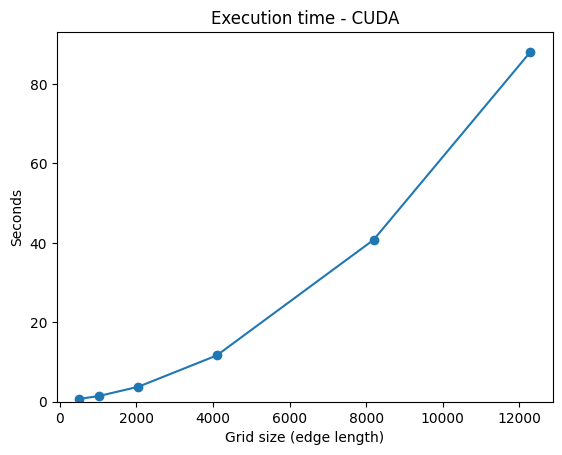

Highest mean execution time: 88.075 with grid size 12288.


In [3]:
import matplotlib.pyplot as plt

x = list(grid_size2exec_time_cuda.keys())
y = list(grid_size2exec_time_cuda.values())

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Execution time - CUDA')
plt.xlabel('Grid size (edge length)')
plt.ylabel('Seconds')
plt.ylim(0, max(y)+5)

# Displaying the plot
plt.show()

print("Highest mean execution time: {max_time:.3f} with grid size {grid_size}."
      .format(max_time = max(y), grid_size = max(grid_size2exec_time_cuda, key = grid_size2exec_time_cuda.get)))


dict_values([0.32, 1.29, 5.52, 22.73, 85.42, 185.49]) dict_values([0.7136647224426269, 1.4464585542678834, 3.762677264213562, 11.645848822593688, 40.75506196022034, 88.07482104301452])


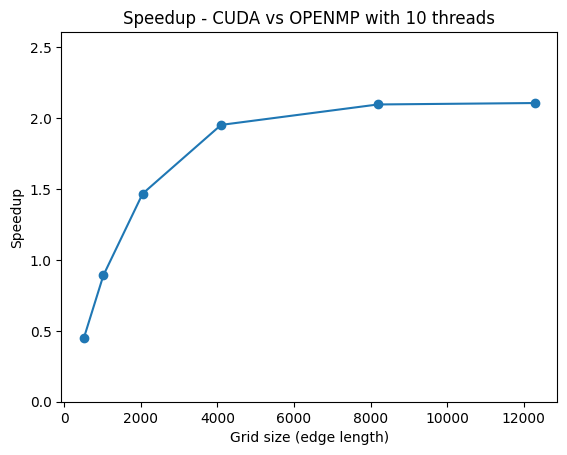

Max speedup: 2.106 for grid size 12288


In [4]:
x = list(grid_size2exec_time_cuda.keys())

omp_values = grid_size2exec_time_omp_cpu_2.values()
cuda_values = grid_size2exec_time_cuda.values()

print(omp_values, cuda_values)
y = [(omp_t/cuda_t) for (omp_t, cuda_t) in list(zip(omp_values, cuda_values))]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Speedup - CUDA vs OPENMP with 10 threads')
plt.xlabel('Grid size (edge length)')
plt.ylabel('Speedup')
plt.ylim(0, max(y)+0.5)

# Displaying the plot
plt.show()

print(f"Max speedup: {max(y):.3f} for grid size {x [y.index(max(y))]}")